<a href="https://colab.research.google.com/github/Rico2000/E-Portfolio/blob/main/E_Portfolio_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cats vs. Dogs


---



![](https://projects-static.raspberrypi.org/projects/cats-vs-dogs/298725f2757eac5246b8182f661b23e2b176bc56/en/images/banner.png
)

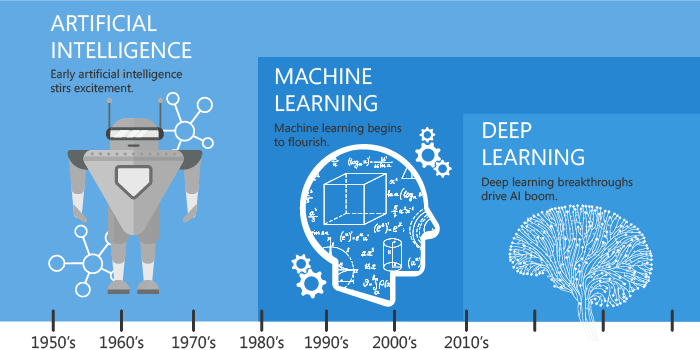

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image
import os
import random
from sklearn.model_selection import train_test_split          
from tensorflow.keras.datasets import cifar10

## Analyse Data

In [ ]:
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

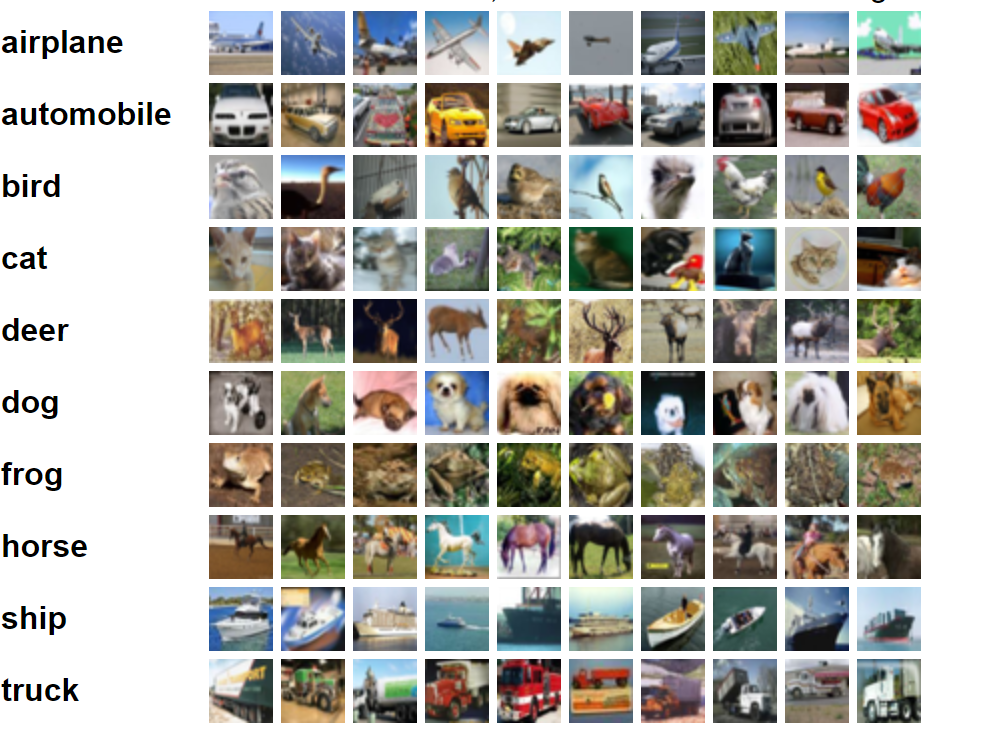

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
index_first_class = ##
index_second_class = ##

In [ ]:
x_train.shape

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


In [ ]:
img = plt.imshow(x_train[0,:,:,:])
plt.title(classes[y_train[0,0]])
plt.show()

In [ ]:
img = plt.imshow(x_train[420,:,:,:])
plt.title(classes[y_train[420,0]])
plt.show()

In [ ]:
rnd_index = [random.randint(0, (x_train.shape[0])) for rnd in range(10)]
fig, axs = plt.subplots(1,10, figsize=(20,2))
for i, index in enumerate(rnd_index):
    axs[i].imshow(x_train[index,:,:,], cmap = "gray")
    axs[i].set_title(classes[y_train[index,0]])  
plt.show()

In [ ]:
_, count = np.unique(y_train, return_counts= True)
for i,c in enumerate(classes):
  print(f'Im Trainingsdatensatz befinden sich {count[i]} Beispiele von {c}')

In [ ]:
_, count = np.unique(y_test, return_counts= True)
for i,c in enumerate(classes):
  print(f'Im Testsdatensatz befinden sich {count[i]} Beispiele von {c}')

## Prepare Data



### Select Data

In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
index_train = ##
index_test =  ##

In [ ]:
y_train = y_train[index_train]
x_train = x_train[index_train]
y_test = y_test[index_test]
x_test = x_test[index_test]

In [ ]:
print(f"Number of training examples: {x_train.shape[0]}")
print(f"Number of test examples: {x_test.shape[0]}")
print(f"Height/Width of each image: {x_train.shape[2]}")
print(f"train_data shape:{x_train.shape}")
print(f"test_data shape:{x_test.shape}")
print(f"train_labels shape:{y_train.shape}")
print(f"test_labels shape:{y_test.shape}")

In [ ]:
rnd_index = [random.randint(0, (x_train.shape[0])) for rnd in range(10)]
fig, axs = plt.subplots(1,10, figsize=(20,2))
for i, index in enumerate(rnd_index):
    axs[i].imshow(x_train[index,:,:,], cmap = "gray")
    axs[i].set_title(classes[y_train[index]])  
plt.show()

In [ ]:
_, count = np.unique(y_train, return_counts= True)
print(f'Im Trainingsdatensatz befinden sich {count[0]} Beispiele von {classes[index_first_class]}')
print(f'Im Trainingsdatensatz befinden sich {count[1]} Beispiele von {classes[index_second_class]}')

In [ ]:
y_test = ##
y_train = ##

### Resize Data

In [ ]:
x_train = ##
x_test = ##

In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1).T
x_test = x_test.reshape(x_test.shape[0],-1).T
y_train = y_train[np.newaxis,:]
y_test = y_test[np.newaxis,:]

# Logistic Regression


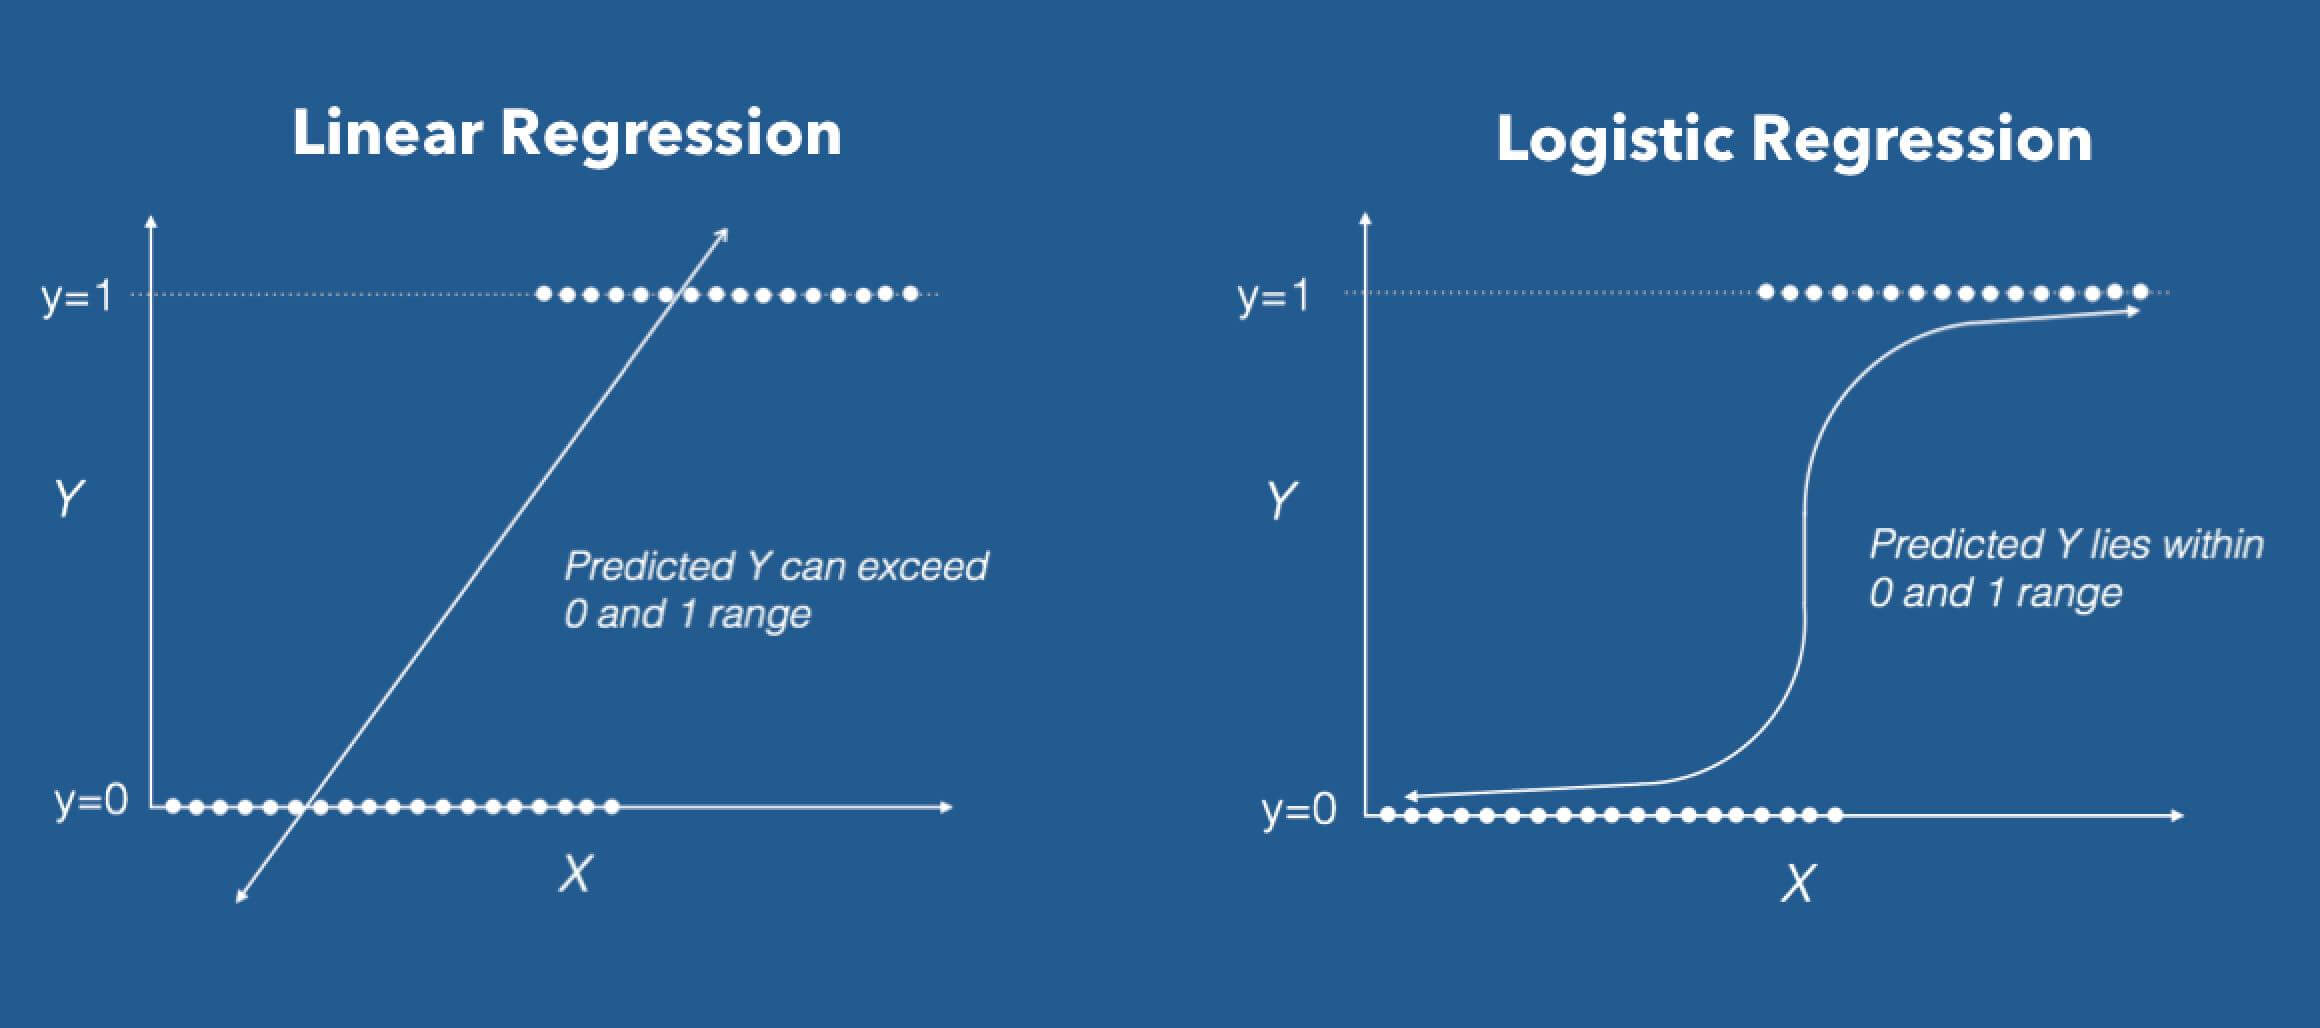

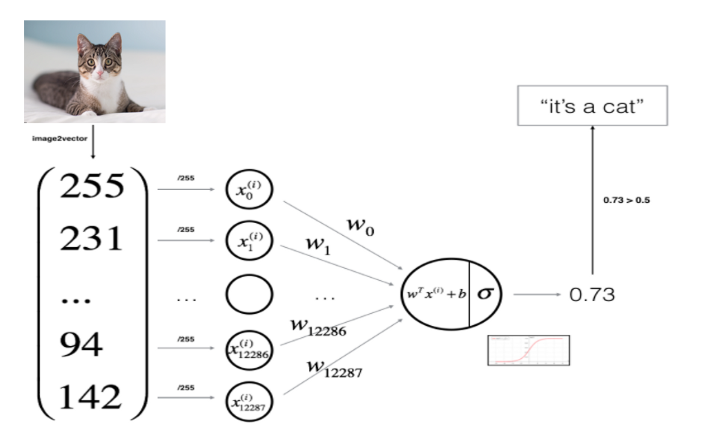


For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

### Sigmoid
$\hat{y}^{(i)} =a^i =\frac{1}{1+e^{z^i}}$


In [ ]:
x = np.linspace(-10, 10, 1000)
z = ##
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.show()

### Helper Functions

In [ ]:
def sigmoid(z):  

In [ ]:
def compute_cost(A,Y): 

In [ ]:
def initalize_weights(dim):

In [ ]:
w,b =initalize_weights(5)
print(f"w= {w}")
print(w.shape)
print(f"b = {b}")

## Build Model

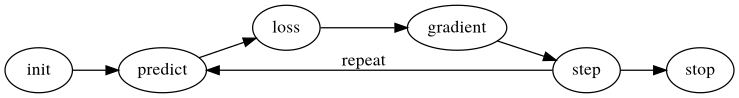

### Forward propagation

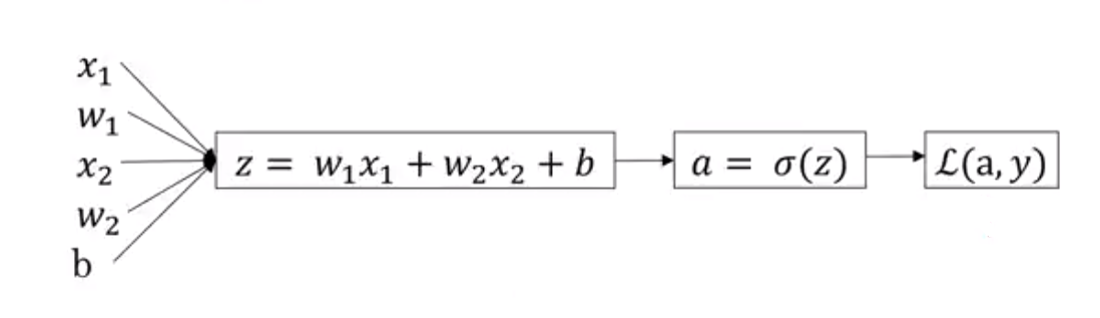

In [ ]:
## Forward Prob


### Backward Propagation

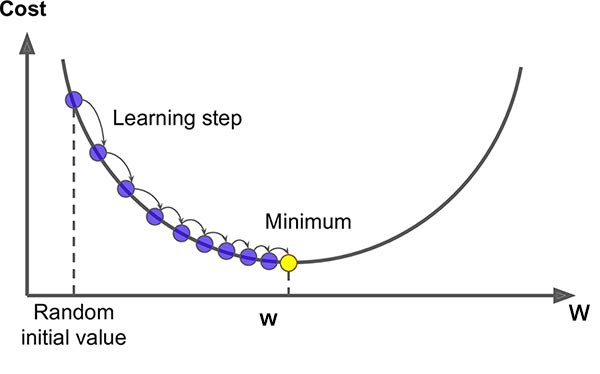

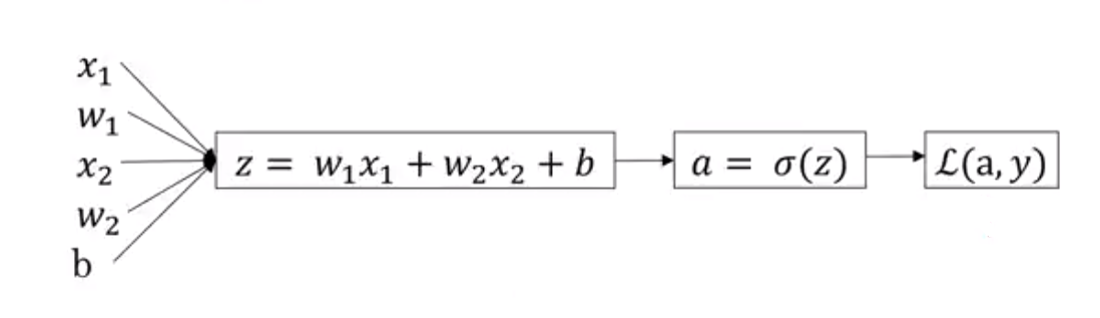

$$\partial a = \frac{\partial\mathcal{L(a,y)}}{\partial a} = -\frac{y}{a} + \frac{1-y}{1-a}$$
$$\partial z = \frac{\partial\mathcal{L(a,y)}}{\partial z} = 
\frac{\partial\mathcal{L(a,y)}}{\partial a} * \frac{\partial a}{\partial z}
=  a- y$$
$$\partial z = \frac{\partial\mathcal{L(a,y)}}{\partial w} = \partial w^{(i)} = x^{(i)} * \partial z
$$
$$\partial 
b = \frac{\partial\mathcal{L(a,y)}}{\partial b} =  \partial z
$$



In [ ]:
def backward_prop(w,b,X,Y,A):
    m = X.shape[1]
    
  
    grads = {"dw": dw,
              "db": db}
    return grads

In [ ]:
def optimize(w,b, X,Y, num_iterations, learning_rate):
    costs = []
  
    for i in range(num_iterations):
        ##
    
    return params, costs


In [ ]:
def predict(w,b,X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    Y_prediction = np.zeros((1,m))
  
    ##

    return Y_prediction

In [ ]:
def model_logistic(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
   ###
  

    print("train accuracy: {:.2f} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {:.2f} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    ret = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return ret

### Standardize Data

In [ ]:
##

## Train Model

In [ ]:
##

## Train Model Evaluate Model

In [ ]:
classes_binary = [classes[index_first_class], classes[index_second_class]]

In [ ]:
costs = np.squeeze(ret['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(ret["learning_rate"]))
plt.show()

In [ ]:
index = 1345
plt.imshow(x_test[:,index].reshape(32,32,3))
plt.show()
print(f"True Label : {classes_binary[y_test[0,index]]}")
print(f"Predicted Label : {classes_binary[int(ret['Y_prediction_test'][0,index])]}")

# Tensorflow

---





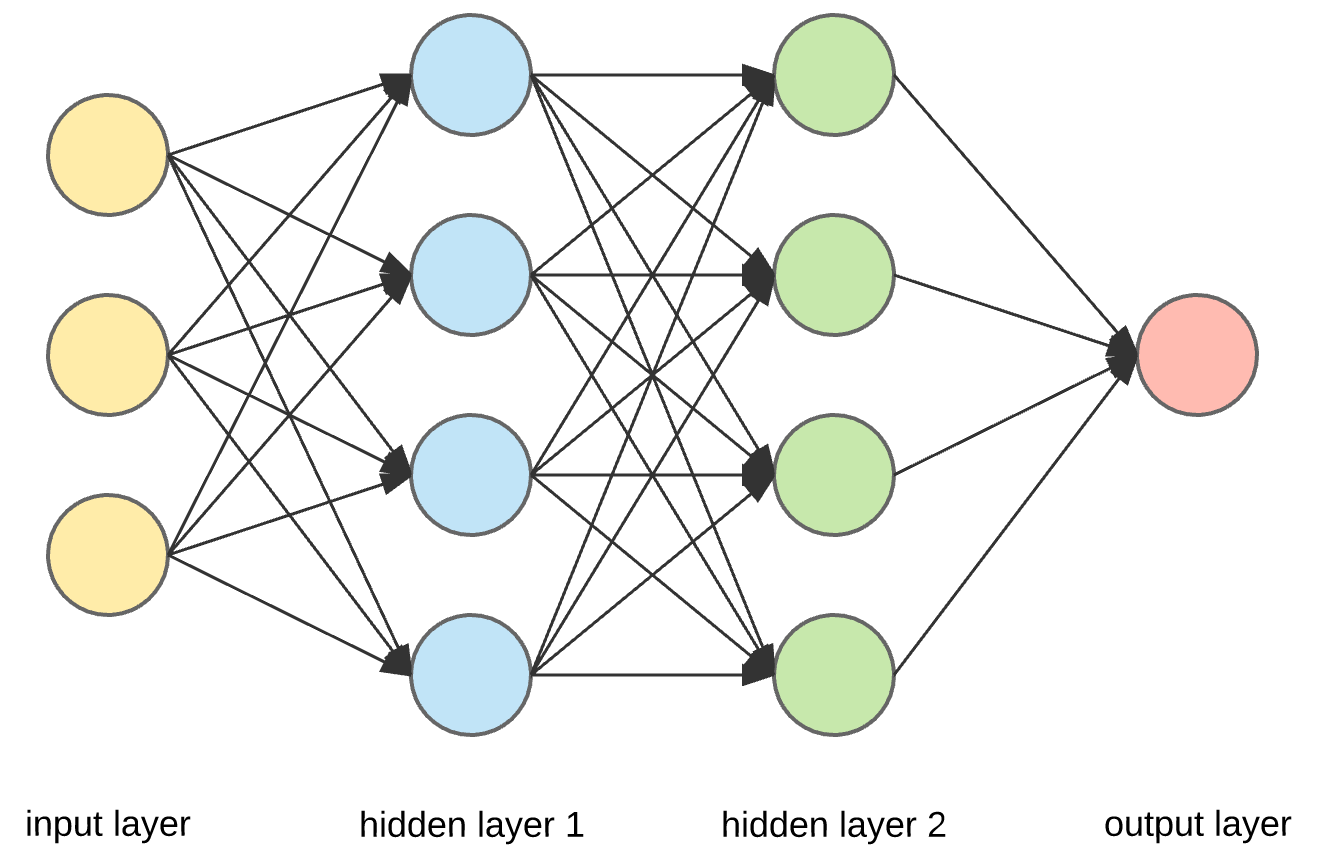

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, Dense, Dropout


In [ ]:
tf.test.is_gpu_available(cuda_only=True)

In [ ]:
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

In [ ]:
x_test = x_test / 255.
x_train = x_train/ 255.

In [ ]:
index_train = np.where((y_train == index_first_class)| (y_train == index_second_class))[0]
index_test = np.where((y_test == index_first_class)| (y_test == index_second_class))[0]

In [ ]:
y_train = y_train[index_train]
x_train = x_train[index_train]
y_test = y_test[index_test]
x_test = x_test[index_test]

In [ ]:
y_test = np.where((y_test == index_first_class),0,1)
y_train = np.where((y_train == index_first_class),0,1)

In [ ]:
resnet = tensorflow.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
)

In [ ]:
resnet.trainable = True

In [ ]:
model = models.Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "adam", loss ="binary_crossentropy",  metrics=['accuracy']  )

In [ ]:
history = model.fit(x_train,y_train, validation_split= 0.1,  epochs = 3) 

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
prob = model.predict(x_test)

In [ ]:
abs_dis= np.abs(y_test-prob)
top = np.where((abs_dis > 0.5))[0]

In [ ]:
preds = np.where((prob > 0.5), 1, 0)

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(20,2))
for i in range(10):
    axs[i].imshow(x_test[top[i],:,:,])
    axs[i].set_title(f'{classes_binary[y_test[top[i],0]]} Pred: {classes_binary[preds[top[i],0]]}')  
plt.show()

In [ ]:
def plot_accuracy(history):
    plt.title("Accuracy Vs Epochs")
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.show()

In [ ]:
def plot_loss(history):
    plt.title("Loss Vs Epochs")
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
    plt.show()